In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os
import umap
from sklearn.neighbors import NearestNeighbors
import leidenalg as la
import igraph as ig
import plotly.express as px

# Set a random seed for reproducibility
np.random.seed(42)

# Define the directory containing the Excel files
directory = 'R:/Lab Share/Seth/Computational/NK Cells/Heterogeneity/'

# Load the Excel files
file_names = [
    'mito_donor_1.xlsx',
    'mito_donor_2.xlsx',
    'mito_donor_3.xlsx',
    'mito_donor_4.xlsx'
]

# Read the Excel files into DataFrames
dfs = [pd.read_excel(os.path.join(directory, file)) for file in file_names]

# Fill missing values with the mean of each column for each DataFrame
filled_dfs = [df.fillna(df.mean()) for df in dfs]

# Add a column to each DataFrame to indicate the dataset of origin
for i, df in enumerate(filled_dfs):
    df['Dataset'] = f'Donor {i+1}'

# Concatenate all DataFrames into one pooled DataFrame
pooled_df = pd.concat(filled_dfs, axis=0)

# Function to perform UMAP, KNN, and Leiden clustering on the pooled dataset using all columns
def perform_umap_knn_leiden_pooled(df, title):
    numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns for UMAP
    
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_df)
    
    # Perform UMAP with a fixed random seed for reproducibility
    reducer = umap.UMAP(random_state=42)
    embedding = reducer.fit_transform(scaled_data)
    
    # Create a graph from the UMAP embedding using sparse matrix
    knn_graph = NearestNeighbors(n_neighbors=15).fit(embedding)
    knn_graph_matrix = knn_graph.kneighbors_graph(embedding)
    
    # Convert the graph to an igraph object
    sources, targets = knn_graph_matrix.nonzero()
    edgelist = list(zip(sources.tolist(), targets.tolist()))
    graph = ig.Graph(edgelist)
    
    # Perform Leiden clustering on the graph
    partition = la.find_partition(graph, la.RBConfigurationVertexPartition)
    clusters = np.array(partition.membership)
    
    # Create a DataFrame for the embedding and add cluster and dataset information
    embedding_df = pd.DataFrame(embedding, columns=['UMAP 1', 'UMAP 2'])
    embedding_df['Cluster'] = clusters
    embedding_df['Dataset'] = df['Dataset'].values
    
    # Plot interactive UMAP with color coding by dataset of origin using Plotly
    fig_dataset = px.scatter(embedding_df, x='UMAP 1', y='UMAP 2', color='Dataset', title=f'UMAP Clustering by Dataset - {title}')
    fig_dataset.show()
    
    # Plot interactive UMAP with color coding by Leiden clustering using Plotly
    fig_cluster = px.scatter(embedding_df, x='UMAP 1', y='UMAP 2', color='Cluster', title=f'UMAP Clustering by Leiden - {title}')
    fig_cluster.show()
    
    return numeric_df, clusters, embedding

# Perform UMAP, KNN, and Leiden clustering on the pooled dataset and create interactive plots using all columns
perform_umap_knn_leiden_pooled(pooled_df, "Pooled Datasets")


c:\Users\srzima\Miniconda3\envs\umap\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\srzima\Miniconda3\envs\umap\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(     Circularity    Area  Geo Diameter
 0       0.954000   8.698      0.574000
 1       0.954000   8.418      4.542000
 2       0.865000   6.235      1.748000
 3       0.708000   0.200      2.320000
 4       0.457000   7.639      4.637000
 ..           ...     ...           ...
 147     0.832017  50.446      5.451008
 148     0.832017  21.808      5.451008
 149     0.832017   0.136      5.451008
 150     0.832017  20.311      5.451008
 151     0.832017  32.830      5.451008
 
 [2332 rows x 3 columns],
 array([ 8,  3,  8, ...,  2, 10,  0]),
 array([[ 9.129972 , -2.0985346],
        [14.811858 ,  9.473227 ],
        [ 8.08982  , -1.5046564],
        ...,
        [16.936243 , 10.971751 ],
        [12.831282 , 10.177328 ],
        [11.377836 , 10.683342 ]], dtype=float32))

c:\Users\srzima\Miniconda3\envs\umap\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



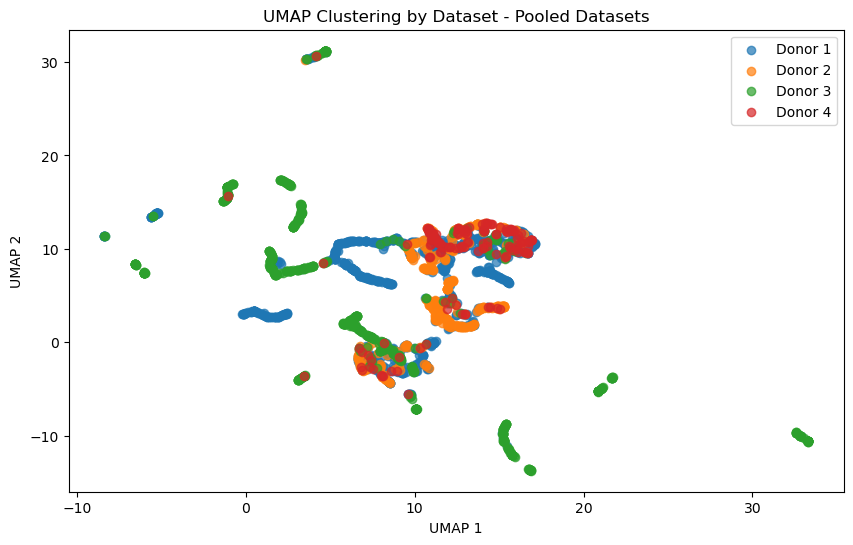

C:\Users\srzima\AppData\Local\Temp\ipykernel_15568\4275168347.py:86: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



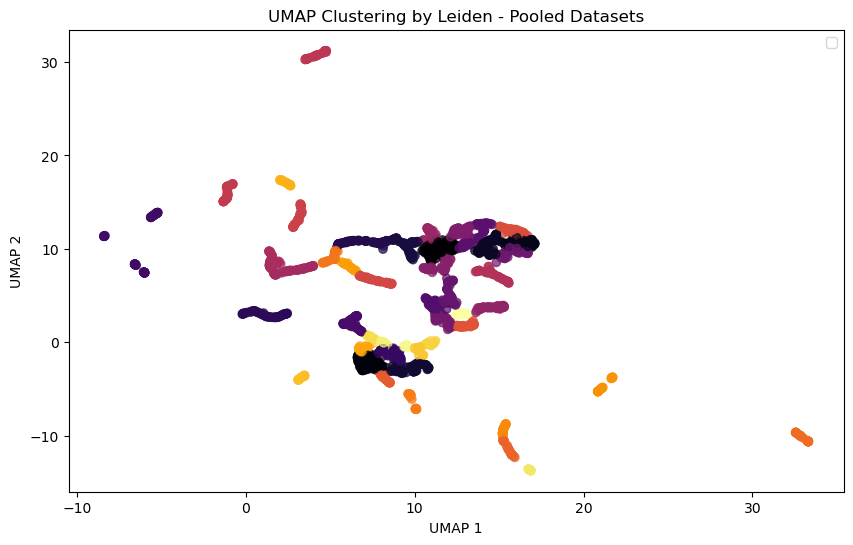

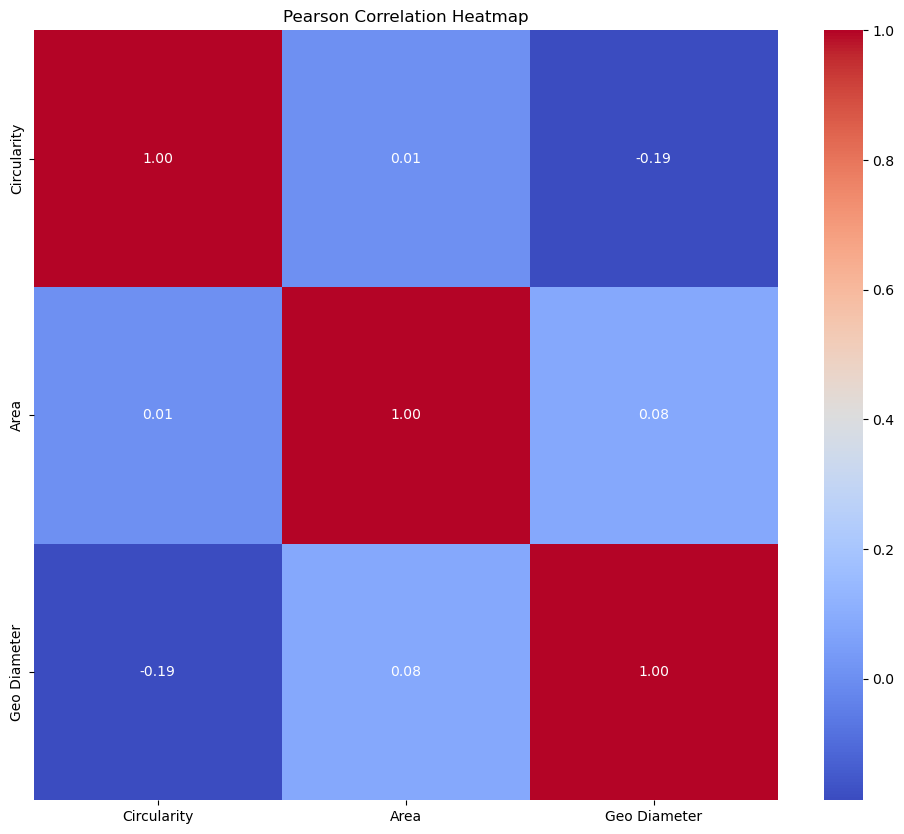

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import os
import umap
from sklearn.neighbors import NearestNeighbors
import leidenalg as la
import igraph as ig

# Set a random seed for reproducibility
np.random.seed(42)

# Define the directory containing the Excel files
directory = 'R:/Lab Share/Seth/Computational/NK Cells/Heterogeneity/'

# Load the Excel files
file_names = [
    'mito_donor_1.xlsx',
    'mito_donor_2.xlsx',
    'mito_donor_3.xlsx',
    'mito_donor_4.xlsx'
]

# Read the Excel files into DataFrames
dfs = [pd.read_excel(os.path.join(directory, file)) for file in file_names]

# Fill missing values with the mean of each column for each DataFrame
filled_dfs = [df.fillna(df.mean()) for df in dfs]

# Add a column to each DataFrame to indicate the dataset of origin
for i, df in enumerate(filled_dfs):
    df['Dataset'] = f'Donor {i+1}'

# Concatenate all DataFrames into one pooled DataFrame
pooled_df = pd.concat(filled_dfs, axis=0)

# Function to perform UMAP, KNN, and Leiden clustering on the pooled dataset using all columns
def perform_umap_knn_leiden_pooled(df, title):
    numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns for UMAP
    
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_df)
    
    # Perform UMAP with a fixed random seed for reproducibility
    reducer = umap.UMAP(random_state=42)
    embedding = reducer.fit_transform(scaled_data)
    
    # Create a graph from the UMAP embedding using sparse matrix
    knn_graph = NearestNeighbors(n_neighbors=15).fit(embedding)
    knn_graph_matrix = knn_graph.kneighbors_graph(embedding)
    
    # Convert the graph to an igraph object
    sources, targets = knn_graph_matrix.nonzero()
    edgelist = list(zip(sources.tolist(), targets.tolist()))
    graph = ig.Graph(edgelist)
    
    # Perform Leiden clustering on the graph
    partition = la.find_partition(graph, la.RBConfigurationVertexPartition)
    clusters = np.array(partition.membership)
    
    # Create a DataFrame for the embedding and add cluster and dataset information
    embedding_df = pd.DataFrame(embedding, columns=['UMAP 1', 'UMAP 2'])
    embedding_df['Cluster'] = clusters
    embedding_df['Dataset'] = df['Dataset'].values
    
    # Plot non-interactive UMAP with color coding by dataset of origin using Matplotlib
    plt.figure(figsize=(10, 6))
    for dataset in embedding_df['Dataset'].unique():
        subset = embedding_df[embedding_df['Dataset'] == dataset]
        plt.scatter(subset['UMAP 1'], subset['UMAP 2'], label=dataset, alpha=0.7)
    plt.title(f'UMAP Clustering by Dataset - {title}')
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.legend()
    plt.show()
    
    # Plot non-interactive UMAP with color coding by Leiden clustering using Matplotlib
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(embedding_df['UMAP 1'], embedding_df['UMAP 2'], c=embedding_df['Cluster'], cmap='inferno', alpha=0.7)
    plt.title(f'UMAP Clustering by Leiden - {title}')
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.legend()
    plt.show()
    
    return numeric_df, clusters, embedding

# Perform UMAP, KNN, and Leiden clustering on the pooled dataset and create non-interactive plots using all columns
numeric_df, clusters, embedding = perform_umap_knn_leiden_pooled(pooled_df, "Pooled Datasets")

# Run Pearson correlation to determine parameter correlation and display as a heatmap
correlation_matrix = numeric_df.corr(method='pearson')

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pearson Correlation Heatmap')
plt.show()



c:\Users\srzima\Miniconda3\envs\umap\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



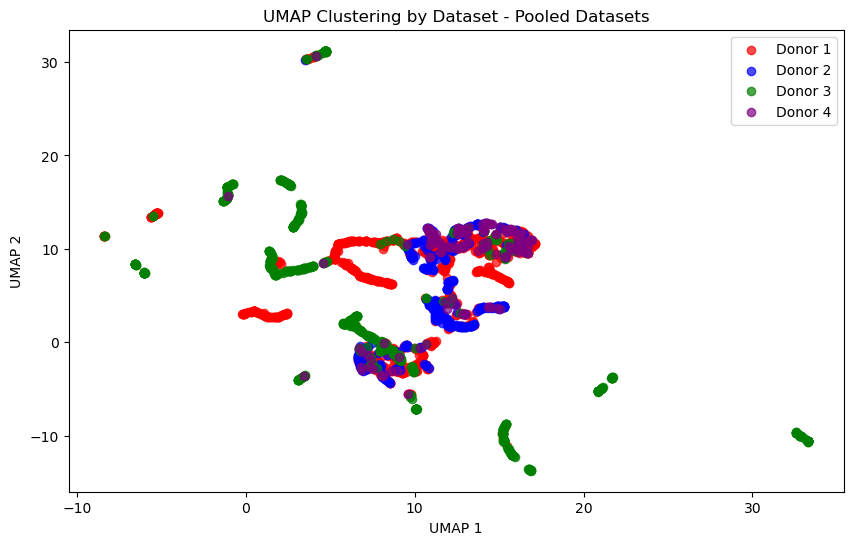

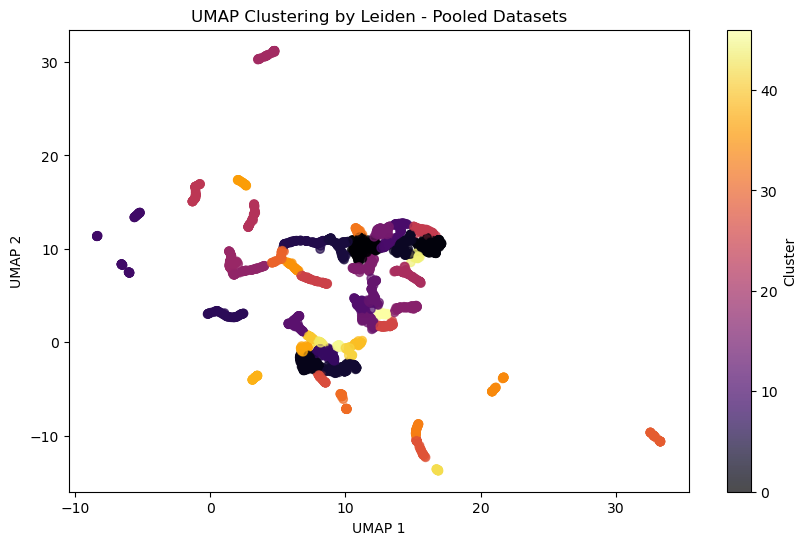

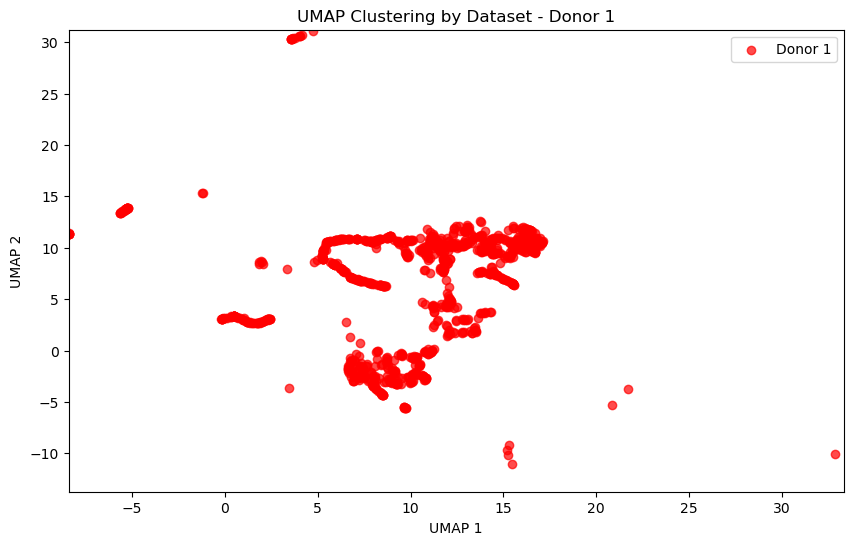

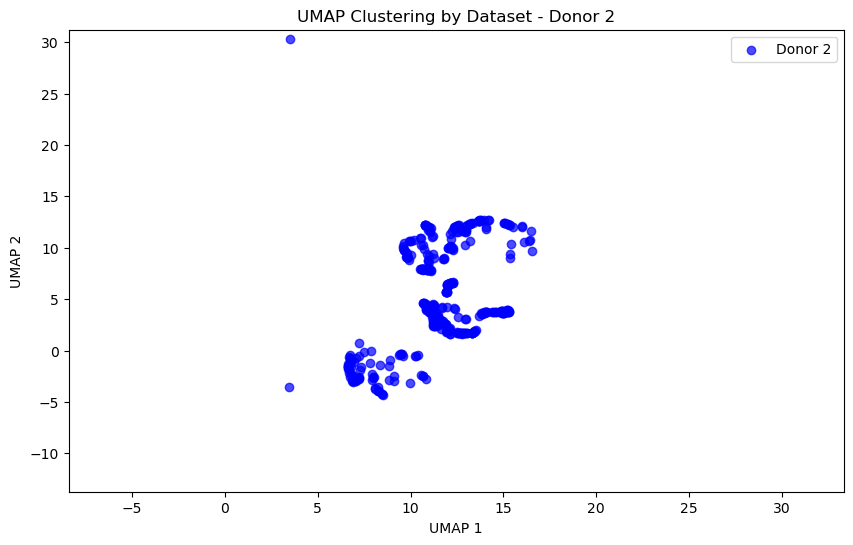

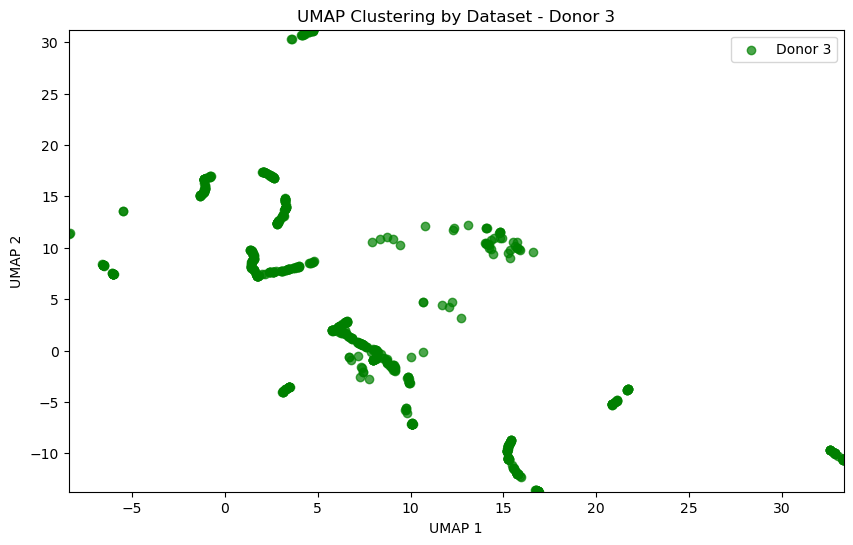

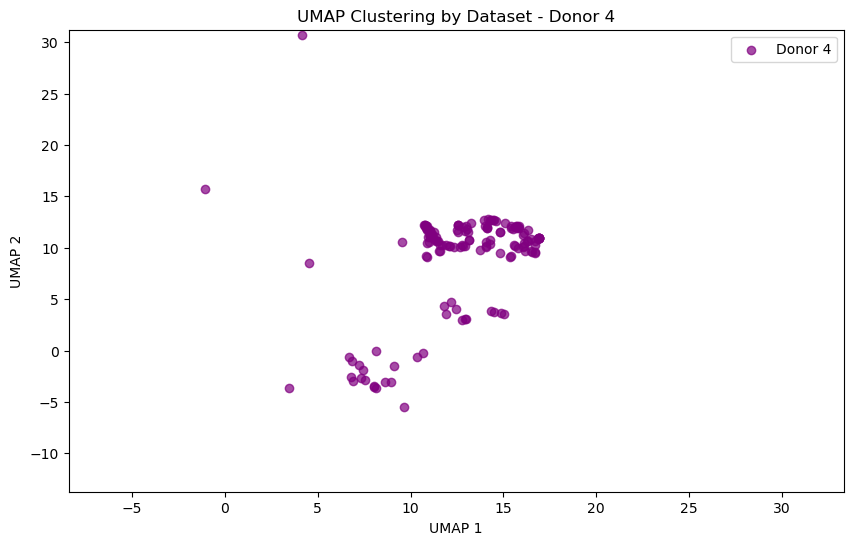

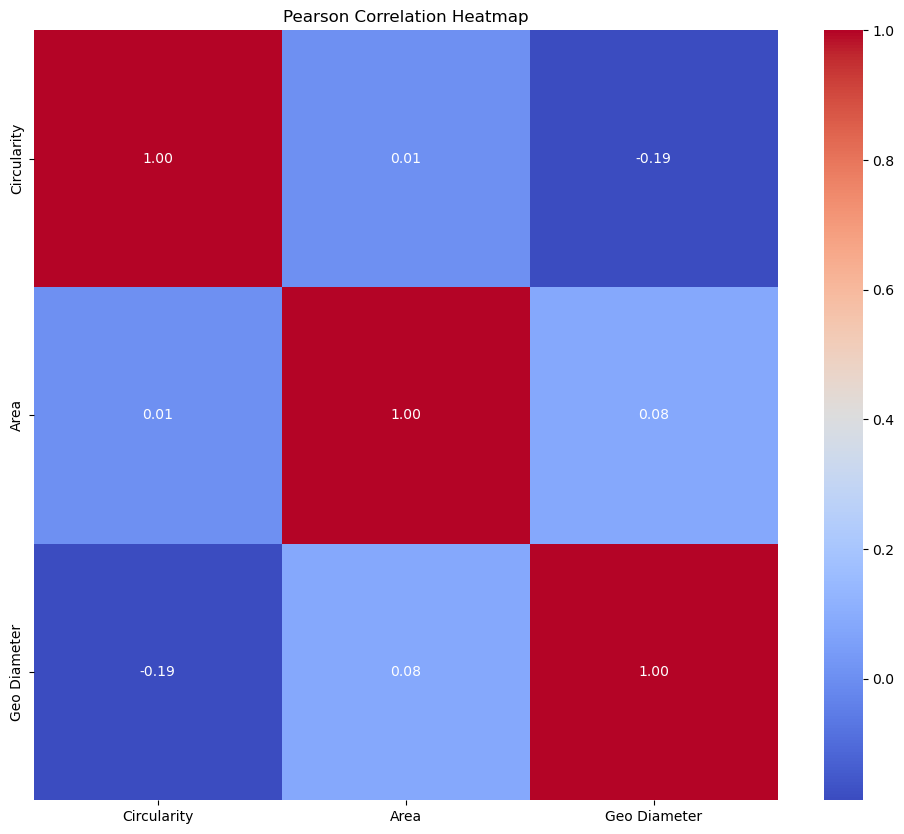

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import os
import umap
from sklearn.neighbors import NearestNeighbors
import leidenalg as la
import igraph as ig

# Set a random seed for reproducibility
np.random.seed(42)

# Define the directory containing the Excel files
directory = 'R:/Lab Share/Seth/Computational/NK Cells/Heterogeneity/'

# Load the Excel files
file_names = [
    'mito_donor_1.xlsx',
    'mito_donor_2.xlsx',
    'mito_donor_3.xlsx',
    'mito_donor_4.xlsx'
]

# Read the Excel files into DataFrames
dfs = [pd.read_excel(os.path.join(directory, file)) for file in file_names]

# Fill missing values with the mean of each column for each DataFrame
filled_dfs = [df.fillna(df.mean()) for df in dfs]

# Add a column to each DataFrame to indicate the dataset of origin
for i, df in enumerate(filled_dfs):
    df['Dataset'] = f'Donor {i+1}'

# Concatenate all DataFrames into one pooled DataFrame
pooled_df = pd.concat(filled_dfs, axis=0)

# Function to perform UMAP, KNN, and Leiden clustering on the pooled dataset using all columns
def perform_umap_knn_leiden_pooled(df, title):
    numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns for UMAP
    
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_df)
    
    # Perform UMAP with a fixed random seed for reproducibility
    reducer = umap.UMAP(random_state=42)
    embedding = reducer.fit_transform(scaled_data)
    
    # Create a graph from the UMAP embedding using sparse matrix
    knn_graph = NearestNeighbors(n_neighbors=15).fit(embedding)
    knn_graph_matrix = knn_graph.kneighbors_graph(embedding)
    
    # Convert the graph to an igraph object
    sources, targets = knn_graph_matrix.nonzero()
    edgelist = list(zip(sources.tolist(), targets.tolist()))
    graph = ig.Graph(edgelist)
    
    # Perform Leiden clustering on the graph
    partition = la.find_partition(graph, la.RBConfigurationVertexPartition)
    clusters = np.array(partition.membership)
    
    # Create a DataFrame for the embedding and add cluster and dataset information
    embedding_df = pd.DataFrame(embedding, columns=['UMAP 1', 'UMAP 2'])
    embedding_df['Cluster'] = clusters
    embedding_df['Dataset'] = df['Dataset'].values
    
    # Define colors for each donor
    colors = ['red', 'blue', 'green', 'purple']
    
    # Plot non-interactive UMAP with color coding by dataset of origin using Matplotlib
    plt.figure(figsize=(10, 6))
    for i, dataset in enumerate(embedding_df['Dataset'].unique()):
        subset = embedding_df[embedding_df['Dataset'] == dataset]
        plt.scatter(subset['UMAP 1'], subset['UMAP 2'], label=dataset, color=colors[i], alpha=0.7)
    plt.title(f'UMAP Clustering by Dataset - {title}')
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.legend()
    plt.show()
    
    # Plot non-interactive UMAP with color coding by Leiden clustering using Matplotlib
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(embedding_df['UMAP 1'], embedding_df['UMAP 2'], c=embedding_df['Cluster'], cmap='inferno', alpha=0.7)
    plt.colorbar(label='Cluster')
    plt.title(f'UMAP Clustering by Leiden - {title}')
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.show()
    
    # Determine the coordinate limits for consistent scaling
    x_min, x_max = embedding_df['UMAP 1'].min(), embedding_df['UMAP 1'].max()
    y_min, y_max = embedding_df['UMAP 2'].min(), embedding_df['UMAP 2'].max()
    
    # Plot non-interactive UMAP with color coding by dataset of origin, one donor at a time with consistent scaling and different colors
    for i, dataset in enumerate(df['Dataset'].unique()):
        plt.figure(figsize=(10, 6))
        subset = embedding_df[embedding_df['Dataset'] == dataset]
        plt.scatter(subset['UMAP 1'], subset['UMAP 2'], label=dataset, color=colors[i], alpha=0.7)
        plt.title(f'UMAP Clustering by Dataset - {dataset}')
        plt.xlabel('UMAP 1')
        plt.ylabel('UMAP 2')
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.legend()
        plt.show()
    
    return numeric_df, clusters, embedding

# Perform UMAP, KNN, and Leiden clustering on the pooled dataset and create non-interactive plots using all columns
numeric_df, clusters, embedding = perform_umap_knn_leiden_pooled(pooled_df, "Pooled Datasets")

# Run Pearson correlation to determine parameter correlation and display as a heatmap
correlation_matrix = numeric_df.corr(method='pearson')

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pearson Correlation Heatmap')
plt.show()


c:\Users\srzima\Miniconda3\envs\umap\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

c:\Users\srzima\Miniconda3\envs\umap\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.

c:\Users\srzima\Miniconda3\envs\umap\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.

c:\Users\srzima\Miniconda3\envs\umap\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

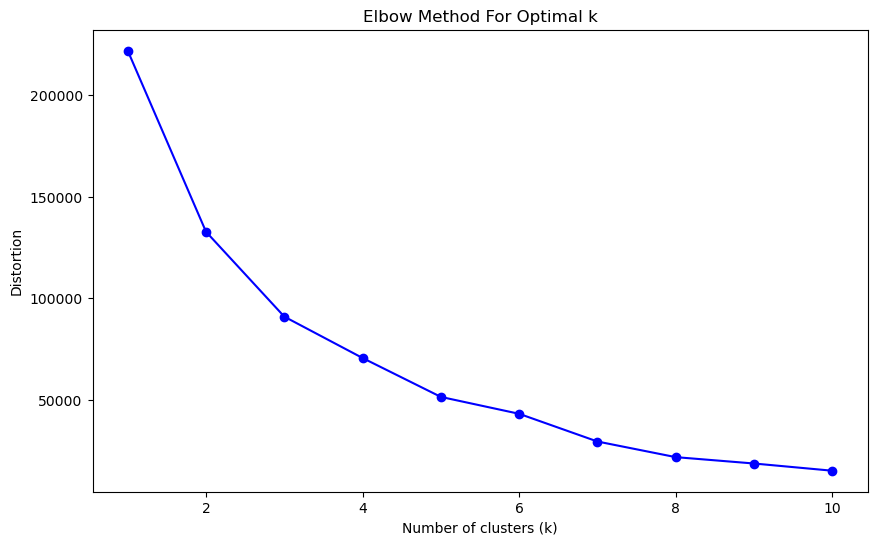

c:\Users\srzima\Miniconda3\envs\umap\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.



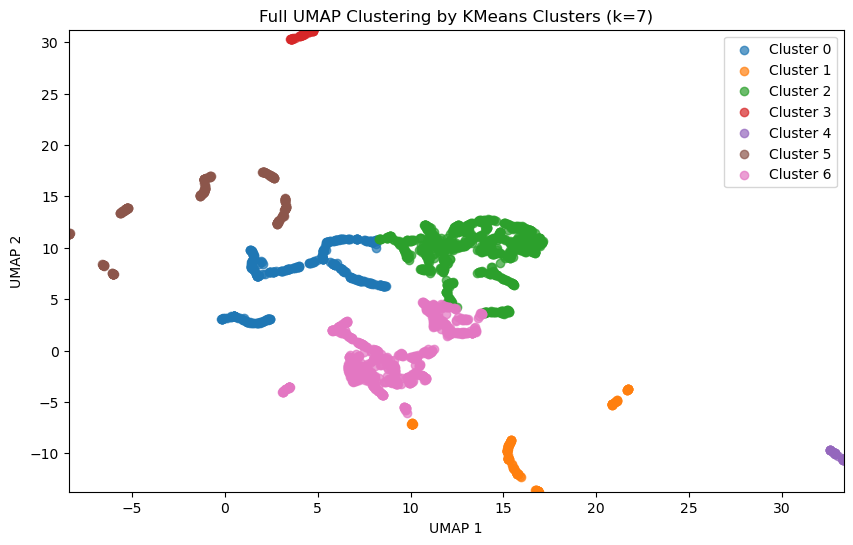

Dataset    Donor 1    Donor 2    Donor 3    Donor 4
Cluster                                            
0        69.252874   0.000000  30.459770   0.287356
1         4.444444   0.000000  95.555556   0.000000
2        55.296857  25.611176   4.656577  14.435390
3        25.490196   1.960784  70.588235   1.960784
4         2.941176   0.000000  97.058824   0.000000
5        18.750000   0.000000  80.729167   0.520833
6        38.990182  30.294530  27.208976   3.506311


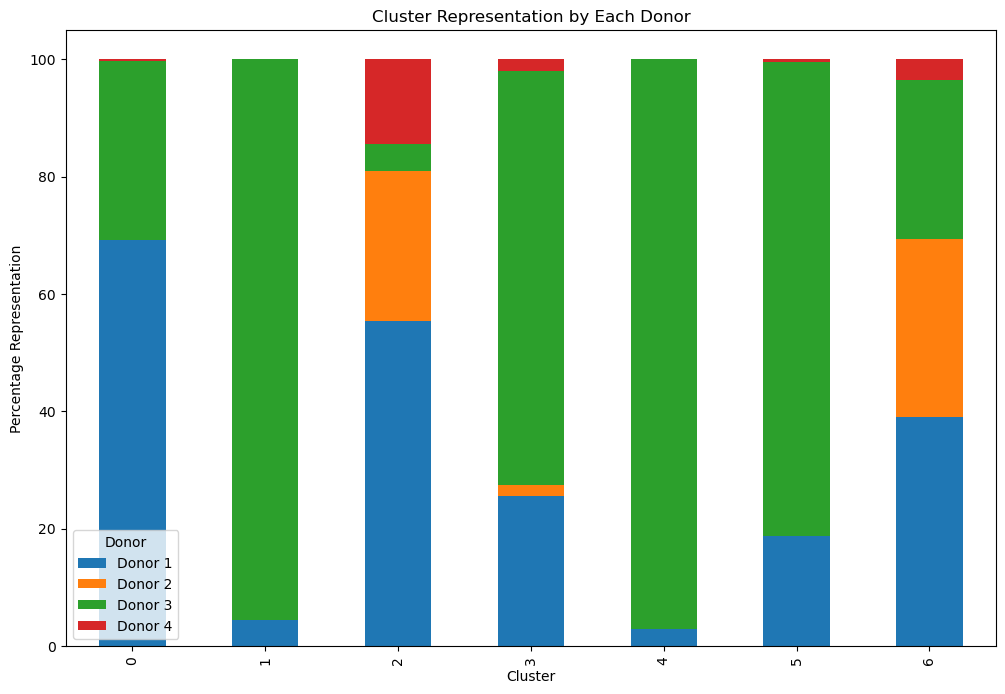

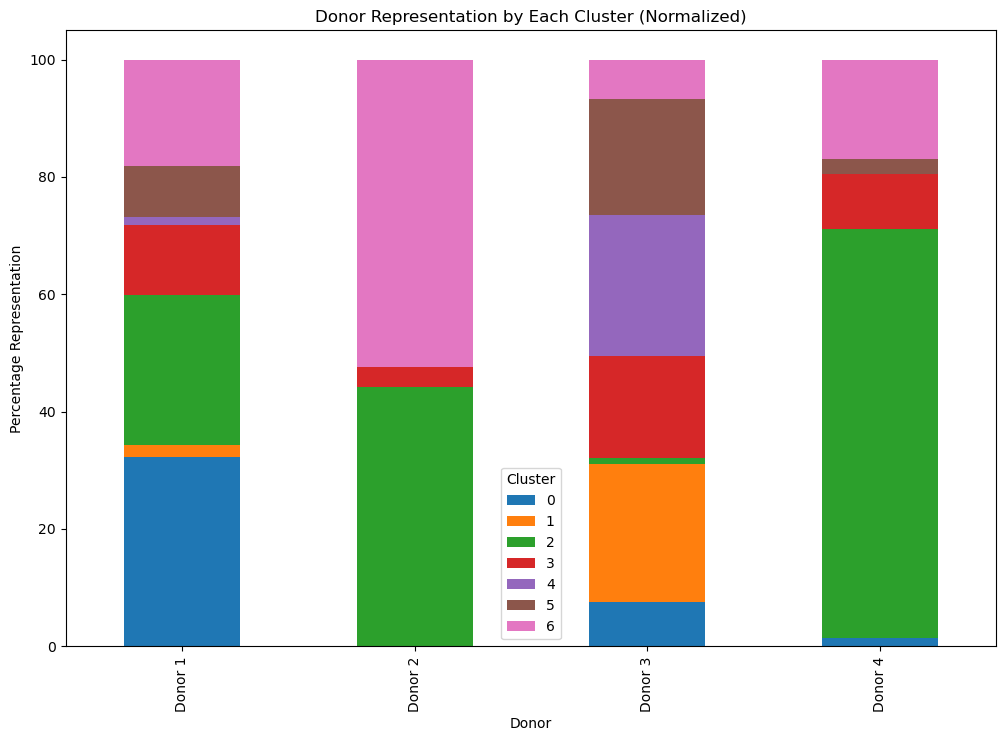

c:\Users\srzima\Miniconda3\envs\umap\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.



              Importance
Circularity   283.165439
Area           95.266839
Geo Diameter  130.010925


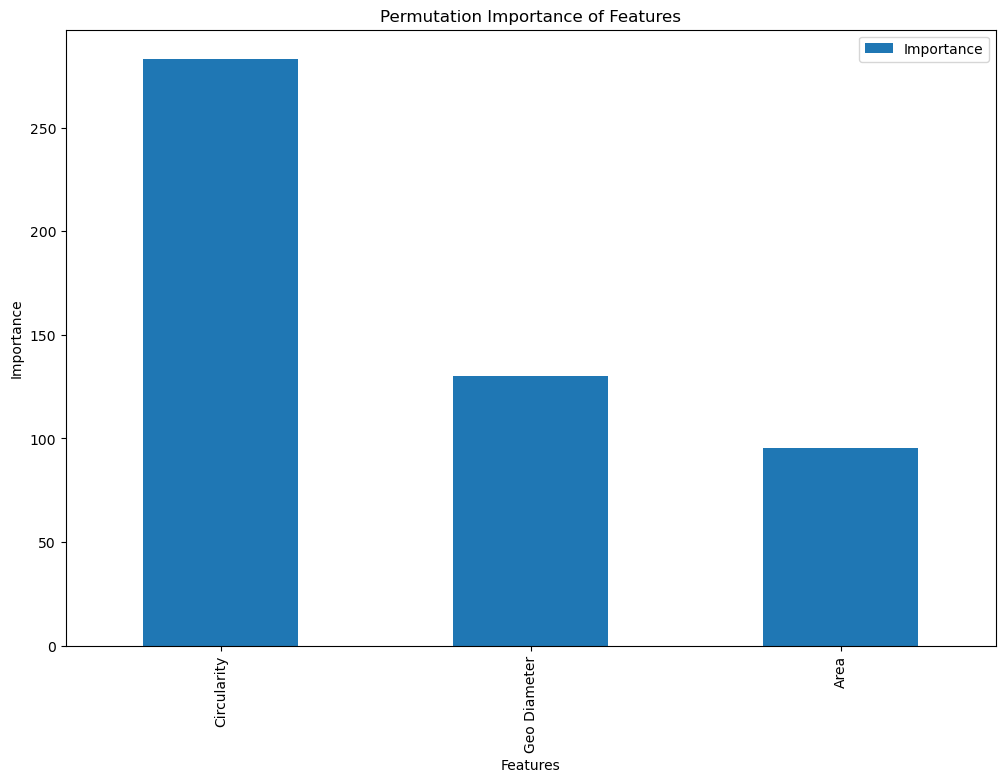

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.inspection import permutation_importance
import os
import umap

# Set a random seed for reproducibility
np.random.seed(42)

# Define the directory containing the Excel files
directory = 'R:/Lab Share/Seth/Computational/NK Cells/Heterogeneity/'

# Load the Excel files
file_names = [
    'mito_donor_1.xlsx',
    'mito_donor_2.xlsx',
    'mito_donor_3.xlsx',
    'mito_donor_4.xlsx'
]

# Read the Excel files into DataFrames
dfs = [pd.read_excel(os.path.join(directory, file)) for file in file_names]

# Fill missing values with the mean of each column for each DataFrame
filled_dfs = [df.fillna(df.mean()) for df in dfs]

# Add a column to each DataFrame to indicate the dataset of origin
for i, df in enumerate(filled_dfs):
    df['Dataset'] = f'Donor {i+1}'

# Concatenate all DataFrames into one pooled DataFrame
pooled_df = pd.concat(filled_dfs, axis=0)

# Function to perform UMAP on the pooled dataset
def perform_umap(df):
    numeric_df = df.select_dtypes(include=[np.number])  # Select all numeric columns for UMAP
    
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_df)
    
    # Perform UMAP with a fixed random seed for reproducibility
    reducer = umap.UMAP(random_state=42)
    embedding = reducer.fit_transform(scaled_data)
    
    return embedding

# Perform UMAP on the pooled dataset
embedding = perform_umap(pooled_df)

# Create a DataFrame for the embedding and add dataset information
embedding_df = pd.DataFrame(embedding, columns=['UMAP 1', 'UMAP 2'])
embedding_df['Dataset'] = pooled_df['Dataset'].values

# Determine the coordinate limits for consistent scaling
x_min, x_max = embedding_df['UMAP 1'].min(), embedding_df['UMAP 1'].max()
y_min, y_max = embedding_df['UMAP 2'].min(), embedding_df['UMAP 2'].max()

# Elbow plot to identify optimal number of clusters using KMeans
def plot_elbow_curve(data):
    distortions = []
    K = range(1, 11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(K, distortions, 'bo-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Distortion')
    plt.title('Elbow Method For Optimal k')
    plt.show()
    
    return distortions

# Plot elbow curve using the UMAP embedding data and determine optimal number of clusters
distortions = plot_elbow_curve(embedding)

# Determine the optimal number of clusters (k) from the elbow plot (manually identified here as an example)
optimal_k = 7

# Perform KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(embedding)

# Add cluster information to the embedding DataFrame
embedding_df['Cluster'] = clusters

# Plot full UMAP with color coding by KMeans clusters using Matplotlib with consistent scaling and different colors
plt.figure(figsize=(10, 6))
for i in range(optimal_k):
    subset = embedding_df[embedding_df['Cluster'] == i]
    plt.scatter(subset['UMAP 1'], subset['UMAP 2'], label=f'Cluster {i}', alpha=0.7)
plt.title(f'Full UMAP Clustering by KMeans Clusters (k={optimal_k})')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend()
plt.show()

# Method to quantify how much of each cluster is represented by each donor
def quantify_cluster_representation(embedding_df):
    cluster_representation = embedding_df.groupby(['Cluster', 'Dataset']).size().unstack(fill_value=0)
    cluster_representation_percentage = cluster_representation.div(cluster_representation.sum(axis=1), axis=0) * 100
    
    return cluster_representation_percentage

# Quantify cluster representation by each donor and display the result
cluster_representation_percentage = quantify_cluster_representation(embedding_df)
print(cluster_representation_percentage)

# Plot stacked bar chart to visualize cluster representation by each donor
cluster_representation_percentage.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Cluster Representation by Each Donor')
plt.xlabel('Cluster')
plt.ylabel('Percentage Representation')
plt.legend(title='Donor')
plt.show()

# Normalize and plot stacked bar chart to visualize donor representation by each cluster (swapped)
donor_representation_percentage = cluster_representation_percentage.T.div(cluster_representation_percentage.T.sum(axis=1), axis=0) * 100
donor_representation_percentage.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Donor Representation by Each Cluster (Normalized)')
plt.xlabel('Donor')
plt.ylabel('Percentage Representation')
plt.legend(title='Cluster')
plt.show()

# Permutation importance test to determine which parameters are most important for driving cluster differences
def permutation_importance_test(df, clusters):
    numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns for permutation importance test
    
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_df)
    
    # Fit KMeans model with optimal number of clusters
    kmeans = KMeans(n_clusters=optimal_k, random_state=42).fit(scaled_data)
    
    # Calculate permutation importance
    result = permutation_importance(kmeans, scaled_data, clusters, n_repeats=10, random_state=42)
    
    # Create a DataFrame for permutation importance results
    importance_df = pd.DataFrame(result.importances_mean, index=numeric_df.columns, columns=['Importance'])
    
    return importance_df

# Perform permutation importance test and display results
importance_df = permutation_importance_test(pooled_df, clusters)
print(importance_df)

# Plot permutation importance results
importance_df.sort_values(by='Importance', ascending=False).plot(kind='bar', figsize=(12, 8))
plt.title('Permutation Importance of Features')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()



c:\Users\srzima\Miniconda3\envs\umap\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

c:\Users\srzima\Miniconda3\envs\umap\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.

c:\Users\srzima\Miniconda3\envs\umap\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.

c:\Users\srzima\Miniconda3\envs\umap\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

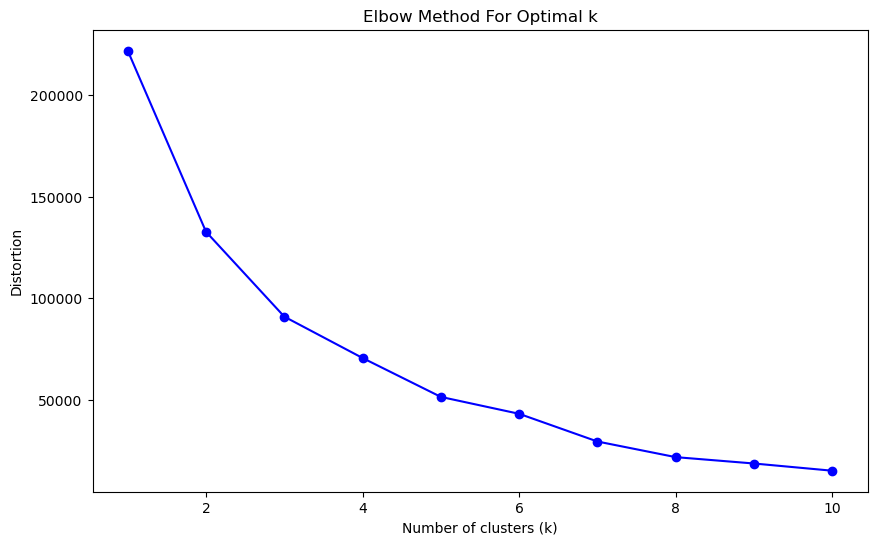

c:\Users\srzima\Miniconda3\envs\umap\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.



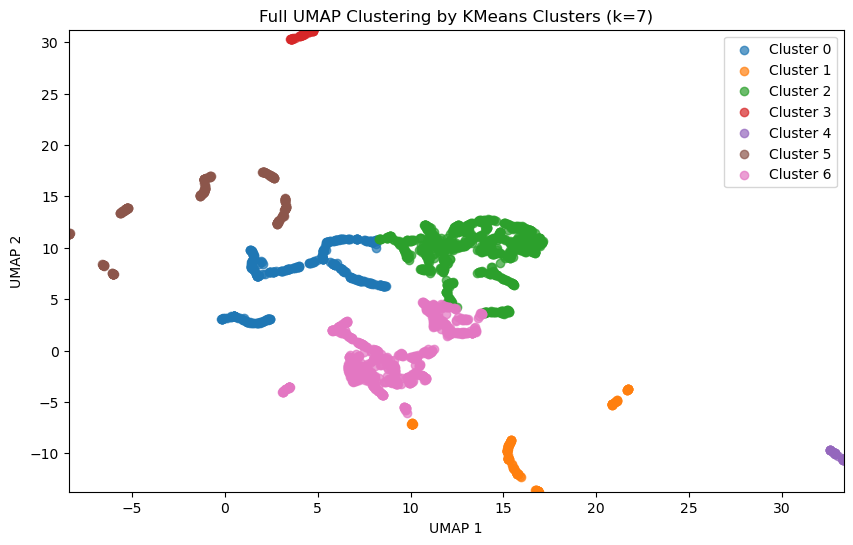

Dataset    Donor 1    Donor 2    Donor 3    Donor 4
Cluster                                            
0        69.252874   0.000000  30.459770   0.287356
1         4.444444   0.000000  95.555556   0.000000
2        55.296857  25.611176   4.656577  14.435390
3        25.490196   1.960784  70.588235   1.960784
4         2.941176   0.000000  97.058824   0.000000
5        18.750000   0.000000  80.729167   0.520833
6        38.990182  30.294530  27.208976   3.506311


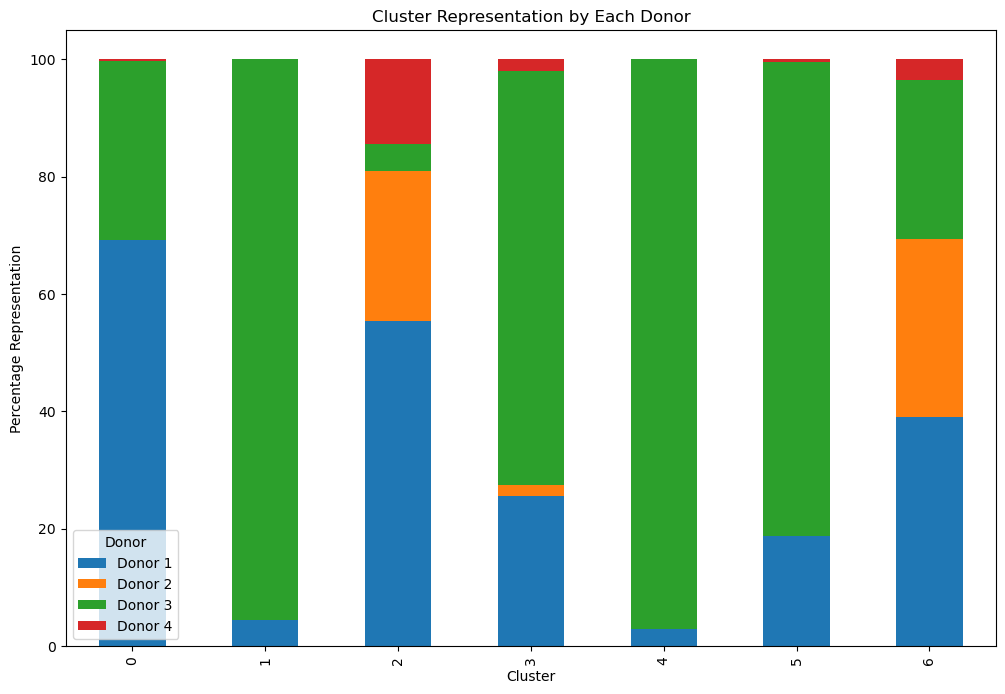

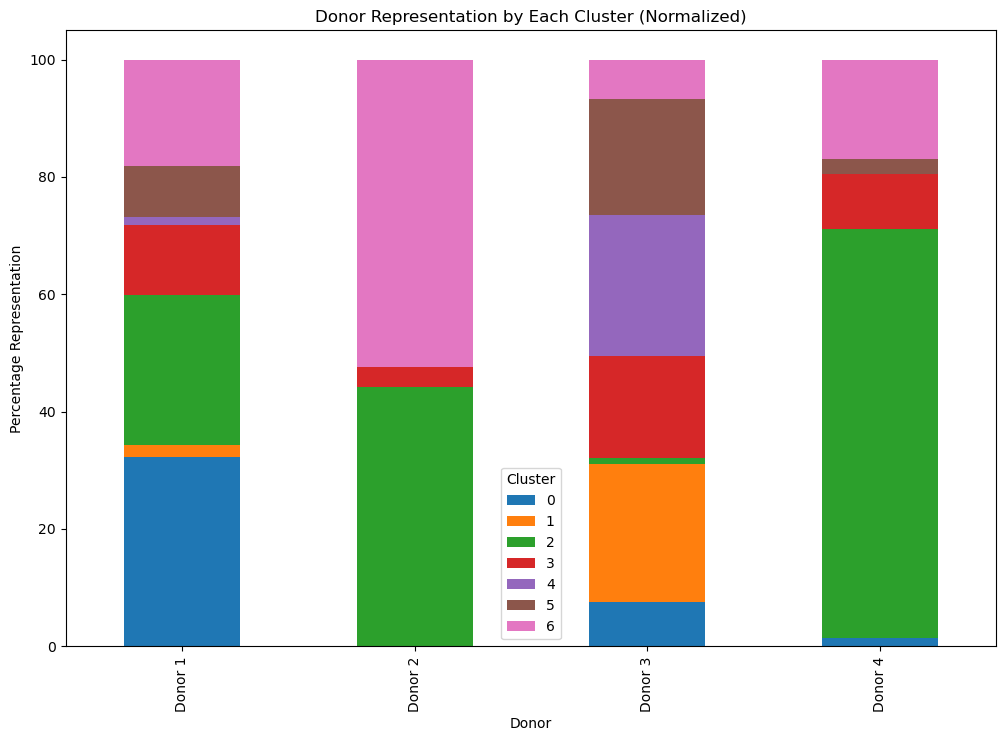

c:\Users\srzima\Miniconda3\envs\umap\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.



              Importance
Circularity   283.165439
Area           95.266839
Geo Diameter  130.010925


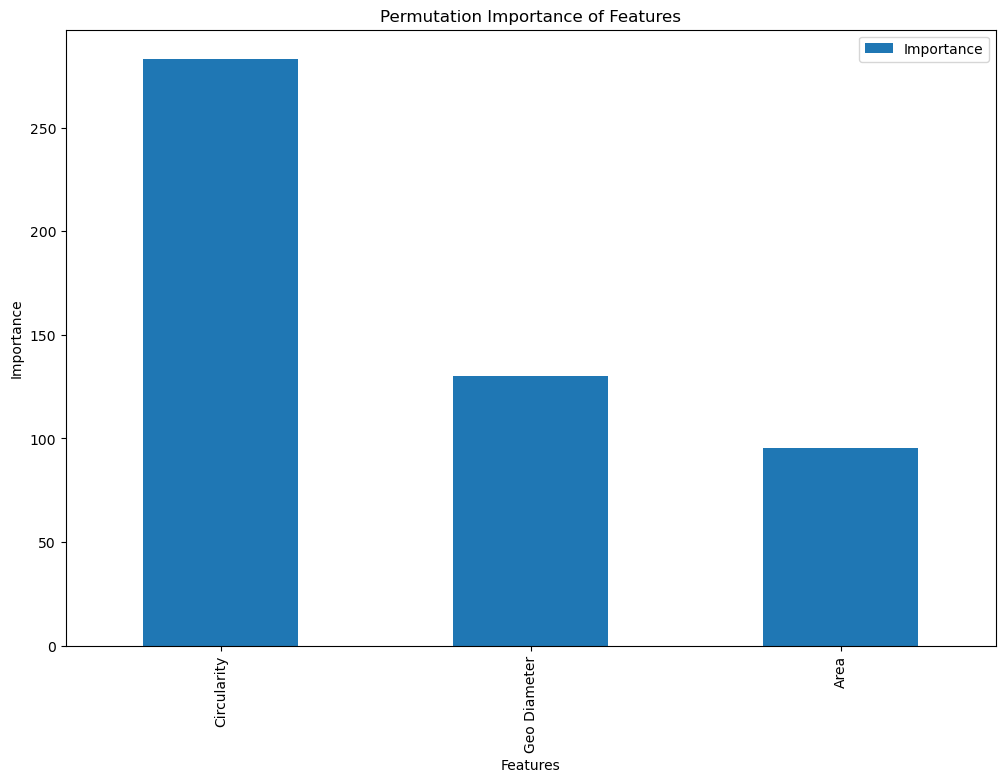

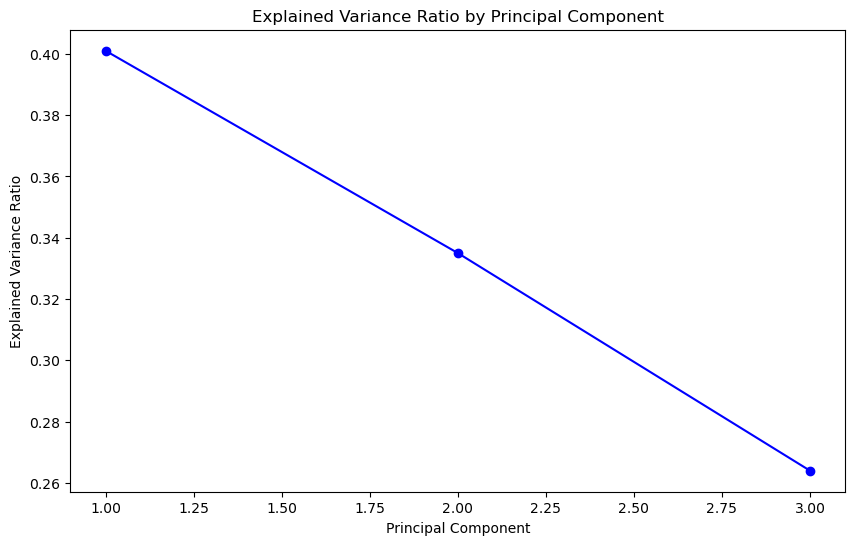

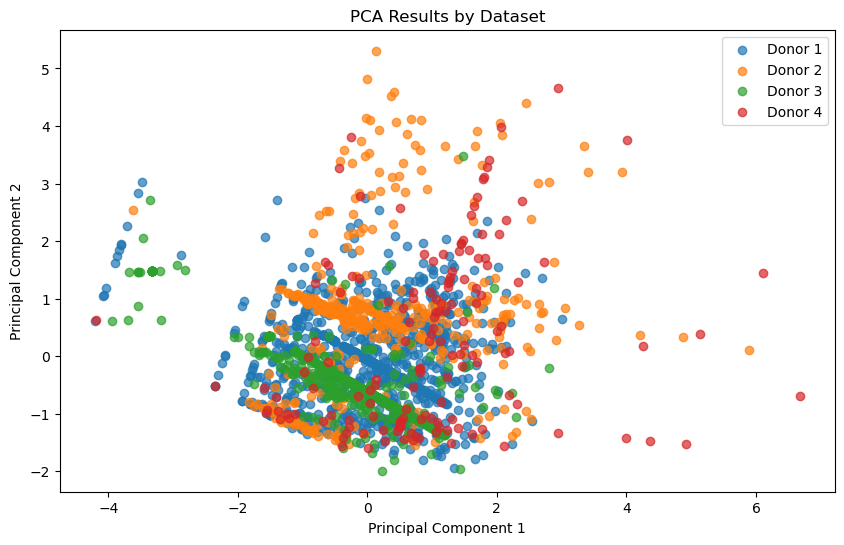

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA
import os
import umap

# Set a random seed for reproducibility
np.random.seed(42)

# Define the directory containing the Excel files
directory = 'R:/Lab Share/Seth/Computational/NK Cells/Heterogeneity/'

# Load the Excel files
file_names = [
    'mito_donor_1.xlsx',
    'mito_donor_2.xlsx',
    'mito_donor_3.xlsx',
    'mito_donor_4.xlsx'
]

# Read the Excel files into DataFrames
dfs = [pd.read_excel(os.path.join(directory, file)) for file in file_names]

# Fill missing values with the mean of each column for each DataFrame
filled_dfs = [df.fillna(df.mean()) for df in dfs]

# Add a column to each DataFrame to indicate the dataset of origin
for i, df in enumerate(filled_dfs):
    df['Dataset'] = f'Donor {i+1}'

# Concatenate all DataFrames into one pooled DataFrame
pooled_df = pd.concat(filled_dfs, axis=0)

# Function to perform UMAP on the pooled dataset
def perform_umap(df):
    numeric_df = df.select_dtypes(include=[np.number])  # Select all numeric columns for UMAP
    
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_df)
    
    # Perform UMAP with a fixed random seed for reproducibility
    reducer = umap.UMAP(random_state=42)
    embedding = reducer.fit_transform(scaled_data)
    
    return embedding

# Perform UMAP on the pooled dataset
embedding = perform_umap(pooled_df)

# Create a DataFrame for the embedding and add dataset information
embedding_df = pd.DataFrame(embedding, columns=['UMAP 1', 'UMAP 2'])
embedding_df['Dataset'] = pooled_df['Dataset'].values

# Determine the coordinate limits for consistent scaling
x_min, x_max = embedding_df['UMAP 1'].min(), embedding_df['UMAP 1'].max()
y_min, y_max = embedding_df['UMAP 2'].min(), embedding_df['UMAP 2'].max()

# Elbow plot to identify optimal number of clusters using KMeans
def plot_elbow_curve(data):
    distortions = []
    K = range(1, 11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(K, distortions, 'bo-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Distortion')
    plt.title('Elbow Method For Optimal k')
    plt.show()
    
    return distortions

# Plot elbow curve using the UMAP embedding data and determine optimal number of clusters
distortions = plot_elbow_curve(embedding)

# Determine the optimal number of clusters (k) from the elbow plot (manually identified here as an example)
optimal_k = 7

# Perform KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(embedding)

# Add cluster information to the embedding DataFrame
embedding_df['Cluster'] = clusters

# Plot full UMAP with color coding by KMeans clusters using Matplotlib with consistent scaling and different colors
plt.figure(figsize=(10, 6))
for i in range(optimal_k):
    subset = embedding_df[embedding_df['Cluster'] == i]
    plt.scatter(subset['UMAP 1'], subset['UMAP 2'], label=f'Cluster {i}', alpha=0.7)
plt.title(f'Full UMAP Clustering by KMeans Clusters (k={optimal_k})')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend()
plt.show()

# Method to quantify how much of each cluster is represented by each donor
def quantify_cluster_representation(embedding_df):
    cluster_representation = embedding_df.groupby(['Cluster', 'Dataset']).size().unstack(fill_value=0)
    cluster_representation_percentage = cluster_representation.div(cluster_representation.sum(axis=1), axis=0) * 100
    
    return cluster_representation_percentage

# Quantify cluster representation by each donor and display the result
cluster_representation_percentage = quantify_cluster_representation(embedding_df)
print(cluster_representation_percentage)

# Plot stacked bar chart to visualize cluster representation by each donor
cluster_representation_percentage.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Cluster Representation by Each Donor')
plt.xlabel('Cluster')
plt.ylabel('Percentage Representation')
plt.legend(title='Donor')
plt.show()

# Normalize and plot stacked bar chart to visualize donor representation by each cluster (swapped)
donor_representation_percentage = cluster_representation_percentage.T.div(cluster_representation_percentage.T.sum(axis=1), axis=0) * 100
donor_representation_percentage.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Donor Representation by Each Cluster (Normalized)')
plt.xlabel('Donor')
plt.ylabel('Percentage Representation')
plt.legend(title='Cluster')
plt.show()

# Permutation importance test to determine which parameters are most important for driving cluster differences
def permutation_importance_test(df, clusters):
    numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns for permutation importance test
    
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_df)
    
    # Fit KMeans model with optimal number of clusters
    kmeans = KMeans(n_clusters=optimal_k, random_state=42).fit(scaled_data)
    
    # Calculate permutation importance
    result = permutation_importance(kmeans, scaled_data, clusters, n_repeats=10, random_state=42)
    
    # Create a DataFrame for permutation importance results
    importance_df = pd.DataFrame(result.importances_mean, index=numeric_df.columns, columns=['Importance'])
    
    return importance_df

# Perform permutation importance test and display results
importance_df = permutation_importance_test(pooled_df, clusters)
print(importance_df)

# Plot permutation importance results
importance_df.sort_values(by='Importance', ascending=False).plot(kind='bar', figsize=(12, 8))
plt.title('Permutation Importance of Features')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Perform PCA on the pooled dataset and plot explained variance ratio
def perform_pca(df):
    numeric_df = df.select_dtypes(include=[np.number])  # Select all numeric columns for PCA
    
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_df)
    
    # Perform PCA with a fixed random seed for reproducibility
    pca = PCA(random_state=42)
    pca_result = pca.fit_transform(scaled_data)
    
    # Create a DataFrame for PCA results
    pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])
    pca_df['Dataset'] = df['Dataset'].values
    
    return pca, pca_df

# Perform PCA on the pooled dataset
pca, pca_df = perform_pca(pooled_df)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

# Plot PCA results with color coding by dataset
plt.figure(figsize=(10, 6))
for dataset in pca_df['Dataset'].unique():
    subset = pca_df[pca_df['Dataset'] == dataset]
    plt.scatter(subset['PC1'], subset['PC2'], label=dataset, alpha=0.7)
plt.title('PCA Results by Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
